## Os impactos do suicídio na pandemia

**Grupo**:
- Ana Beatiz 
- Andson 
- Bruna 
- Lucca
- Thiago

**Matéria**:

Projeto integrado: Storytelling

### Instalações

In [18]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install plotly
!pip3 install numpy
!pip3 install folium
!pip3 install wordcloud
!pip3 install bs4
#!pip3 install 
#!pip3 install 

### Bibliotecas

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
from bs4 import BeautifulSoup

#### Análise comentários do Twitter

Esta análise visa 

Importando os dados

In [4]:
# WordCloud 1

twitter_NAM =pd.read_csv(r'./Data/twitter_1.csv', sep=',')

#Limpando os dados, retirando colunas desnecessárias
twitter_NAM= twitter_NAM.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_NAM.columns.values[0]= 'Usuário'
twitter_NAM.columns.values[1]= 'Data de postagem'
twitter_NAM.columns.values[2]= 'Texto'

#twitter_NAM.info()
twitter_NAM.head(8)

Usuário      Data de postagem  \
0      cherrywrxs  2021-05-10T19:07:55Z   
1      pipoca_sep  2021-05-10T18:43:03Z   
2  MathKavalcante  2021-05-10T18:20:18Z   
3   Madame_Cosett  2021-05-10T18:11:56Z   
4        Visatotn  2021-05-10T18:04:15Z   
5   H3LBERTGE0RGE  2021-05-10T17:29:04Z   
6     Lailapadua4  2021-05-10T17:20:31Z   
7      mary_sozzo  2021-05-10T17:12:28Z   

                                               Texto  
0  RT @aslion: tou tão desinteressada últimamente...  
1  Cortei a franja da Anna, ela se mexeu, ficou t...  
2  RT @aslion: tou tão desinteressada últimamente...  
3  RT @aslion: tou tão desinteressada últimamente...  
4  eu. não. consigo. mais. viver. nesse. país. te...  
5  que ódiokk\n\n@DynaRiotS2 @Mushro0mBoy bora en...  
6  @alarissamatos Já não consigo nem viver direit...  
7  Minha mente é um turbilhão mais eu consigo viv...

In [5]:
# WordCloud 2

twitter_SD =pd.read_csv(r'./Data/twitter_2.csv', sep=',')

twitter_SD= twitter_SD.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_SD.columns.values[0]= 'Usuário'
twitter_SD.columns.values[1]= 'Data de postagem'
twitter_SD.columns.values[2]= 'Texto'

#twitter_SD.info()
twitter_SD.head(8)

Usuário      Data de postagem  \
0  bibi98209150  2021-05-11T21:37:40Z   
1      _Capela5  2021-05-11T21:21:59Z   
2       Oxe_imp  2021-05-11T21:14:45Z   
3   marquesa22_  2021-05-11T21:12:47Z   
4   louispiola2  2021-05-11T21:11:29Z   
5  DjGeanSilvaa  2021-05-11T20:57:17Z   
6    littlejezz  2021-05-11T20:46:34Z   
7  patriciaob13  2021-05-11T20:44:20Z   

                                               Texto  
0  @svenusblack @odiar_homem @beyangeI ta rindo p...  
1  Já tinha aqui umas mensagens para ajudar pesso...  
2  @guarana @elleir_cs @oocbrazil Eu vou suicidar...  
3  @brunamsss Amiga, o filme viajou demais na mai...  
4  @Killmyalma me queiro matar balear morir suicidar  
5  RT @biianbjb: gente, eu quero de fato me suici...  
6  Tirando a última parte da conversa, isso me le...  
7  Eu repito pra mim mesma q n tem nd q eu n ague...

In [6]:
# WordCloud 3

twitter_SC =pd.read_csv(r'./Data/twitter_3.csv', sep=',')

twitter_SC= twitter_SC.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_SC.columns.values[0]= 'Usuário'
twitter_SC.columns.values[1]= 'Data de postagem'
twitter_SC.columns.values[2]= 'Texto'

#twitter_SC.info()
twitter_SC.head(8)

Usuário      Data de postagem  \
0       yleunameem  2021-05-10T22:33:13Z   
1         __bieela  2021-05-10T22:33:08Z   
2        marieamts  2021-05-10T22:33:03Z   
3    jungkookincel  2021-05-10T22:32:52Z   
4  sarafonseca1893  2021-05-10T22:32:43Z   
5      peachjjinie  2021-05-10T22:32:38Z   
6         ifsfairy  2021-05-10T22:32:25Z   
7       padeiiroo2  2021-05-10T22:32:25Z   

                                               Texto  
0        coragem pra cometer suicídio só queria isso  
1         Já te falei vida do crime é suicidio lento  
2  RT @nacarulyna: nao ironicamente   suicídio es...  
3  RT @gatinhopodre: opiniao que provavelmente va...  
4  RT @ruuelmaa: Nem consigo imaginar o tamanho d...  
5  RT @mafleurjk: ⚠️ prevenção de suicídio ⚠️\r\n...  
6  tw // suicídio\r\n.\r\n.\r\n.\r\n.\r\n.\r\n.\r...  
7  @_haime_souza unica coisa impedindo meu suicid...

Gerando os WordClouds

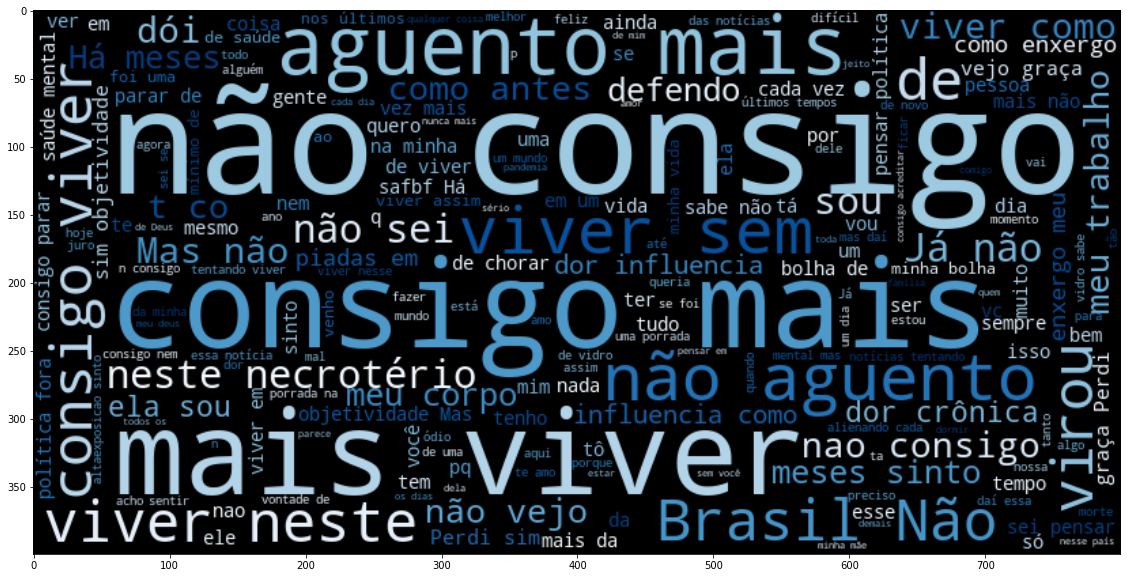

In [7]:
# WordCloud 1

# Texto com todas as palavras que a coluna 'Texto'
text = " ".join(review for review in twitter_NAM.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

# Criando stopwords paera remover as palavras indesejadas
stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "e", "pra", "o", "que", "t: co", "e ela", "paulo gustavo", "https", "Bolsonaro", "é", "veiadoscausos", "t  co", "Eu", "gustavo", "paulo  gustavo", "paulo"])

# Gerando a imagem da word cloud 
wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

# Exibição da imagem gerada pelo matplotlib 
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

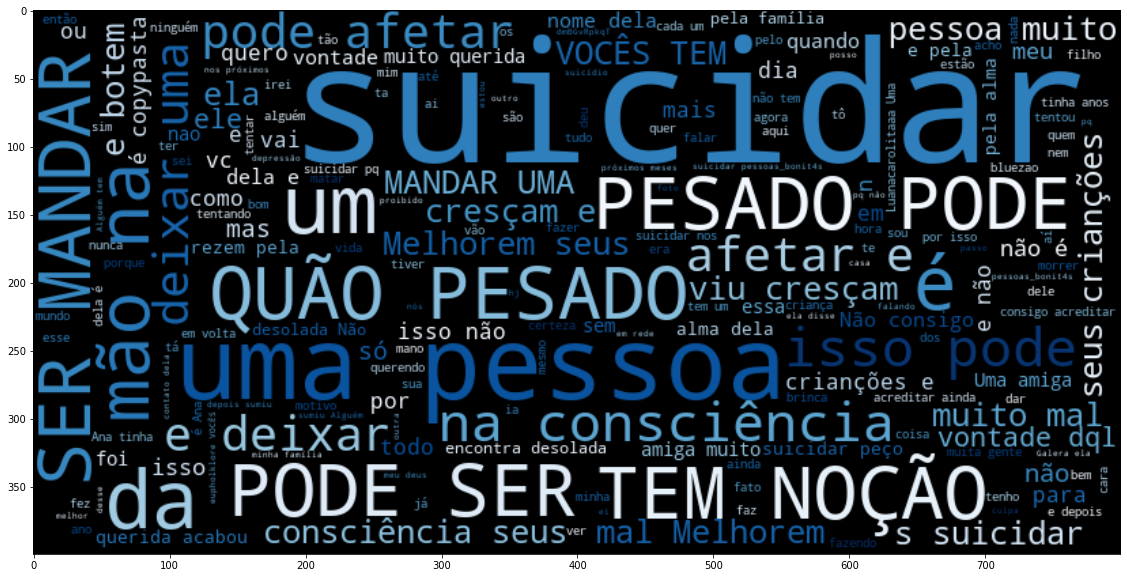

In [8]:
# WordCloud 2

text = " ".join(review for review in twitter_SD.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "https", "t", "de", "t  co", "q", "o", "se", "eu", "vou", "co", "porra", "imbecis", "Ldivino_ribeiro", " porra ", "que", "pra"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

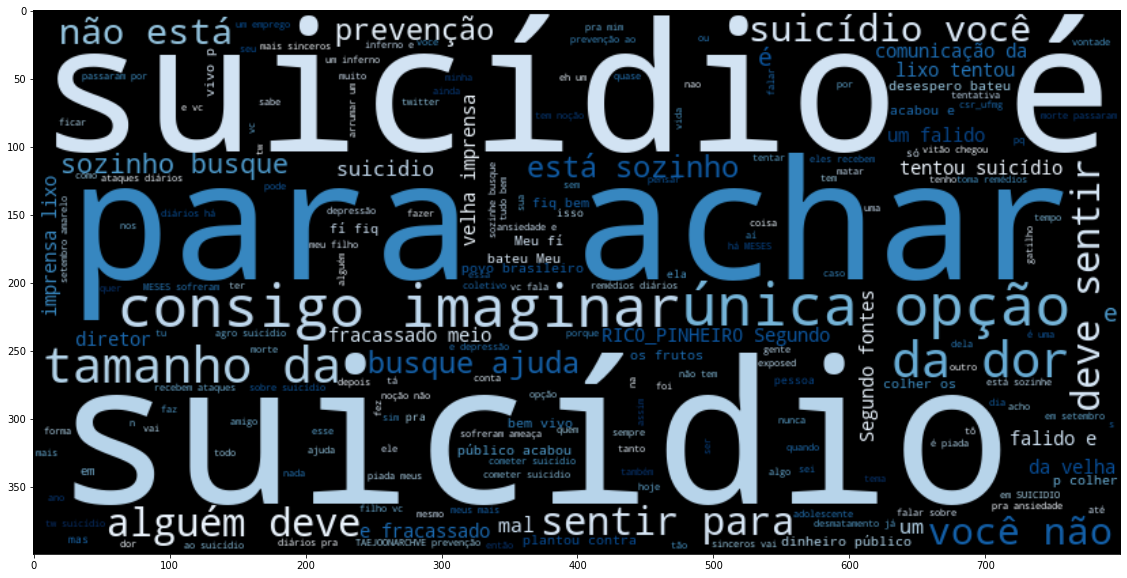

In [9]:
# WordCloud 3

text = " ".join(review for review in twitter_SC.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "https", "t", "de", "t  co", "q", "o", "se", "eu", "vou", "co", "ruuelmaa", "Nem", "NuXfIsTwjc", "byangells", "fuder", "whindersson", "mamata", "luisa", "RICO_PINHEIRO", "EstadaoFake", "que"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### Análise relatórios mensais do CVV (Centro de Valorização a Vida)

Analisando os gráficos mensais de Janeiro de 2020 até Março de 2021, no qual constam tempo de atendimento por faixas de tempe nota-se que o tempo varia de menos de 1 minuto até mais de 1 horas de ligação


Importando os dados

Gerando os gráficos

#### Análise Google trends

Importando os dados

In [10]:
# Gráfico 1

colunas = ['semana_2020', 'porcentagem_2020', 'semana_2019', 'porcentagem_2019']
suicide_searches = pd.read_csv(r'./Data/multiTimeline.csv', sep=',', header=0, names=colunas)

#suicide_searches.info()
suicide_searches.head(8)

semana_2020  porcentagem_2020 semana_2019  porcentagem_2019
0  2020-01-05                53  2019-01-06                52
1  2020-01-12                50  2019-01-13                50
2  2020-01-19                53  2019-01-20                50
3  2020-01-26                51  2019-01-27                49
4  2020-02-02                49  2019-02-03                67
5  2020-02-09                51  2019-02-10                53
6  2020-02-16                63  2019-02-17                56
7  2020-02-23                51  2019-02-24                61

In [11]:
# Gráfico 2

colunas = ['Semana','Japão', 'Brasil', 'Estados Unidos']
bra_eua_jap_searches= pd.read_csv(r'./Data/multiTimeline cópia.csv', sep= ',', header=0, names=colunas)
#bra_eua_jap_searches = bra_eua_jap_searches.drop([0,1], axis=0)

#bra_eua_jap_searches.info()
bra_eua_jap_searches.head(8)

Semana  Japão  Brasil  Estados Unidos
0  2020-01-05     26      11              13
1  2020-01-12     16      10              15
2  2020-01-19     13      14              16
3  2020-01-26     16      12              15
4  2020-02-02     16      11              15
5  2020-02-09     14      10              15
6  2020-02-16     22      11              17
7  2020-02-23     14      10              15

In [12]:
# Gráfico 3

geo = pd.read_csv("./Data/geoMap.csv", header=0, names=['pais', '2020', '2019'])
geo.dropna(inplace=True)

# geo.info()
geo.head(8)

pais  2020  2019
0           Japão    58    42
1        Paraguai    38    62
2             Irã    51    49
3        Colômbia    37    63
4   Coreia do Sul    50    50
5         Turquia    44    56
6  Estados Unidos    47    53
7          Brasil    41    59

Gerando gráfico

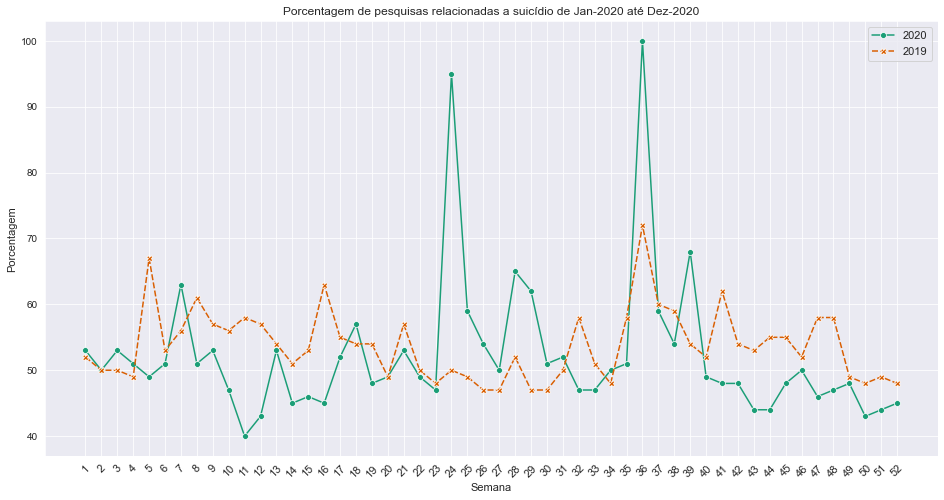

In [13]:
# Gráfico 1

sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.title('Porcentagem de pesquisas relacionadas a suicídio de Jan-2020 até Dez-2020')
ax = sns.lineplot(data = suicide_searches, palette='Dark2', markers=True, legend= False)
plt.legend(loc= 'upper right', labels= ['2020', '2019'], fontsize= 11)
ax.xaxis.set_major_locator(mticker.FixedLocator(list(range(0,52))))
ax.set_xticklabels(list(range(1,53)))
ax.set_xlabel('Semana', fontsize=11)
ax.set_ylabel('Porcentagem', fontsize=11)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], rotation=45, fontsize=11)
plt.show()

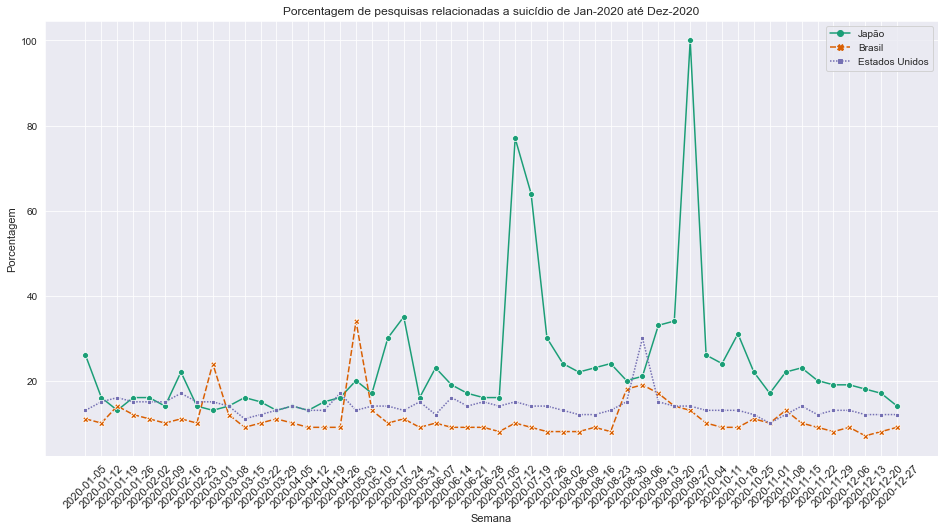

In [14]:
# Gráfico 2

sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.title('Porcentagem de pesquisas relacionadas a suicídio de Jan-2020 até Dez-2020')
ax = sns.lineplot(data = bra_eua_jap_searches, palette='Dark2', markers=True) #legend= False)
ax.xaxis.set_major_locator(mticker.FixedLocator(list(range(0,52))))
ax.set_xticklabels(bra_eua_jap_searches['Semana'])
ax.set_xlabel('Semana', fontsize=11)
ax.set_ylabel('Porcentagem', fontsize=11)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], rotation=45, fontsize=11)
plt.show()

In [15]:
# Gráfico 3

graf1 = go.Bar(x=geo["pais"], y=geo["2019"], name = '2019', marker = {'color': '#feca57'})
graf2 = go.Bar(x=geo["pais"], y=geo["2020"], name = '2020', marker = {'color': '#ff9f43'})
data = [graf1, graf2]
layout = go.Layout(title='Comparação de pesquisas sobre suicídio entre 2019 e 2020',
                   yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Países'},
                   barmode="stack",
                   height=600, width=1000)
fig = go.Figure(data=data, layout=layout)                
py.iplot(fig)

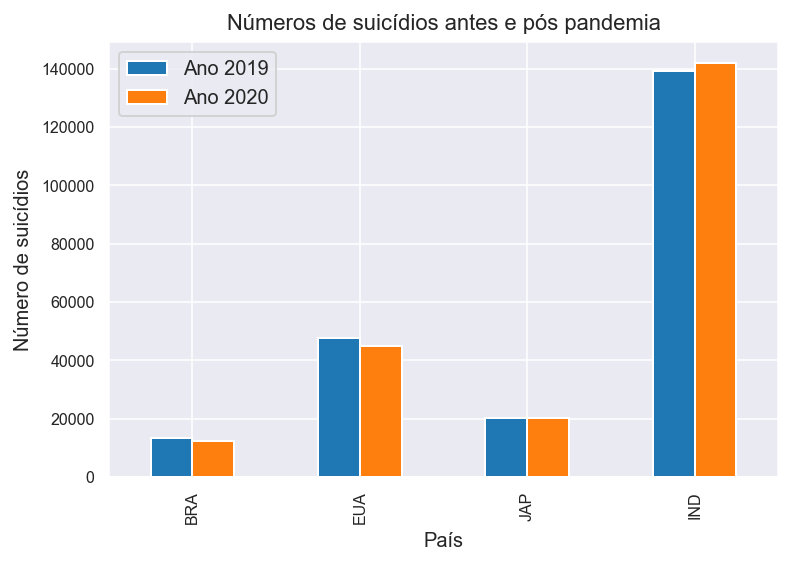

In [23]:
# Gráficos 4

plt.rcParams["figure.figsize"] = [6,4]
%config InlineBackend.figure_format = 'retina'

#pd.Series([65, 61, 25, 22]).plot(kind="bar")
plotdata = pd.DataFrame({"Suicídios": [65, 61, 25, 22]})
plotdata = pd.DataFrame({
    "Ano 2019":[13467, 47511, 20169, 139065],
    "Ano 2020":[12325, 44834, 20081, 142000]
    }, 
    index=["BRA", "EUA", "JAP", "IND"]
)
plotdata.plot(kind="bar")
plt.title("Números de suicídios antes e pós pandemia", fontsize= 11)
plt.xlabel("País", fontsize= 10)
plt.ylabel("Número de suicídios", fontsize= 10)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.show()

### Análise do site 

In [24]:
url = ('http://antigo.saude.gov.br/saude-de-a-z/suicidio')

page = requests.get('http://antigo.saude.gov.br/saude-de-a-z/suicidio')
# print(page)

bs = BeautifulSoup(page.text, 'html.parser')

titulo = bs.find_all('h1')
titulo = titulo[0].get_text()
print(f'titulo:{titulo}')

paragrafos = bs.find_all('p')
paragrafos = [paragrafos[i].get_text () for i in range(0, 7)]
# print(paragrafos)

paragrafos

titulo:
			Prevenção do suicídio: sinais para saber e agir		


['',
 'O suicídio é um fenômeno complexo, multifacetado e de múltiplas determinações, que pode afetar indivíduos de diferentes origens, classes sociais, idades, orientações sexuais e identidades de gênero. \nMas o suicídio pode ser prevenido! Saber reconhecer os sinais de alerta em si mesmo ou em alguém próximo a você pode ser o primeiro e mais importante passo. Por isso, fique atento(a) se a pessoa demonstra comportamento suicida e procure ajudá-la.',
 '',
 '',
 '',
 'Os sinais de alerta descritos abaixo não devem ser considerados isoladamente. Não há uma “receita” para detectar seguramente quando uma pessoa está vivenciando uma crise suicida, nem se tem algum tipo de tendência suicida. Entretanto, um indivíduo em sofrimento pode dar certos sinais, que devem chamar a atenção de seus familiares e amigos próximos, sobretudo se muitos desses sinais se manifestam ao mesmo tempo',
 'Essas manifestações não devem ser interpretadas como ameaças nem como chantagens emocionais, mas sim como av

In [25]:
nome_dataset = 'atlas_violencia_dados-series'

df = pd.read_csv('./Data/suicidios.csv', sep= ';')

df.head(8)


cod nome  nome_comp    lat    lon  período  valor
0   11   RO   Rondônia -10.83 -63.34   1979.0   21.0
1   12   AC       Acre  -8.77 -70.55   1979.0    2.0
2   13   AM   Amazonas  -3.47 -65.10   1979.0   19.0
3   14   RR    Roraima   1.99 -61.33   1979.0    2.0
4   15   PA       Pará  -3.79 -52.48   1979.0   55.0
5   16   AP      Amapá   1.41 -51.77   1979.0    2.0
6   17   TO  Tocantins  -9.46 -48.26   1979.0    0.0
7   21   MA   Maranhão  -5.42 -45.44   1979.0   15.0

**Conclusão**

Em um primeiro momento, foram selecionados os 04 estados com maiores taxas de mortalidade por suicídio ( Roraima, Acre, Amazonas, Pará ) e Santa Catarina, que ocupa o 10º lugar no ranking, tendo em vista o número de indígenas no estado e a alta incidência de suicídio entre essa população. O MS, por meio de apoito técnico e financiamento, acompanhando esses 6 estados na elaboração de seus respectivos Planos Estaduais de Prevenção do Suicídio, os quais funcionarão como projetos pilotos para construção do Plano Nacional de Prevenção do Suicício